In [1]:
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import os
import pandas as pd
import scipy.constants as ct
import random

In [3]:
#Get the QE data from the Hamamatsu Km3net paper and put into notebook
#this HamamatsuQE.txt can be found in SUMMERSTUDENTS/mens/modules as it is also coded into my module
qeData = np.loadtxt('Data/HamamatsuQE.txt',delimiter="\t")
f = interp.CubicSpline(qeData.T[0],qeData.T[1],extrapolate=False)
xpts = np.linspace(min(qeData.T[0]),max(qeData.T[0]),250)
intPts = f(xpts)

<IPython.core.display.Javascript object>


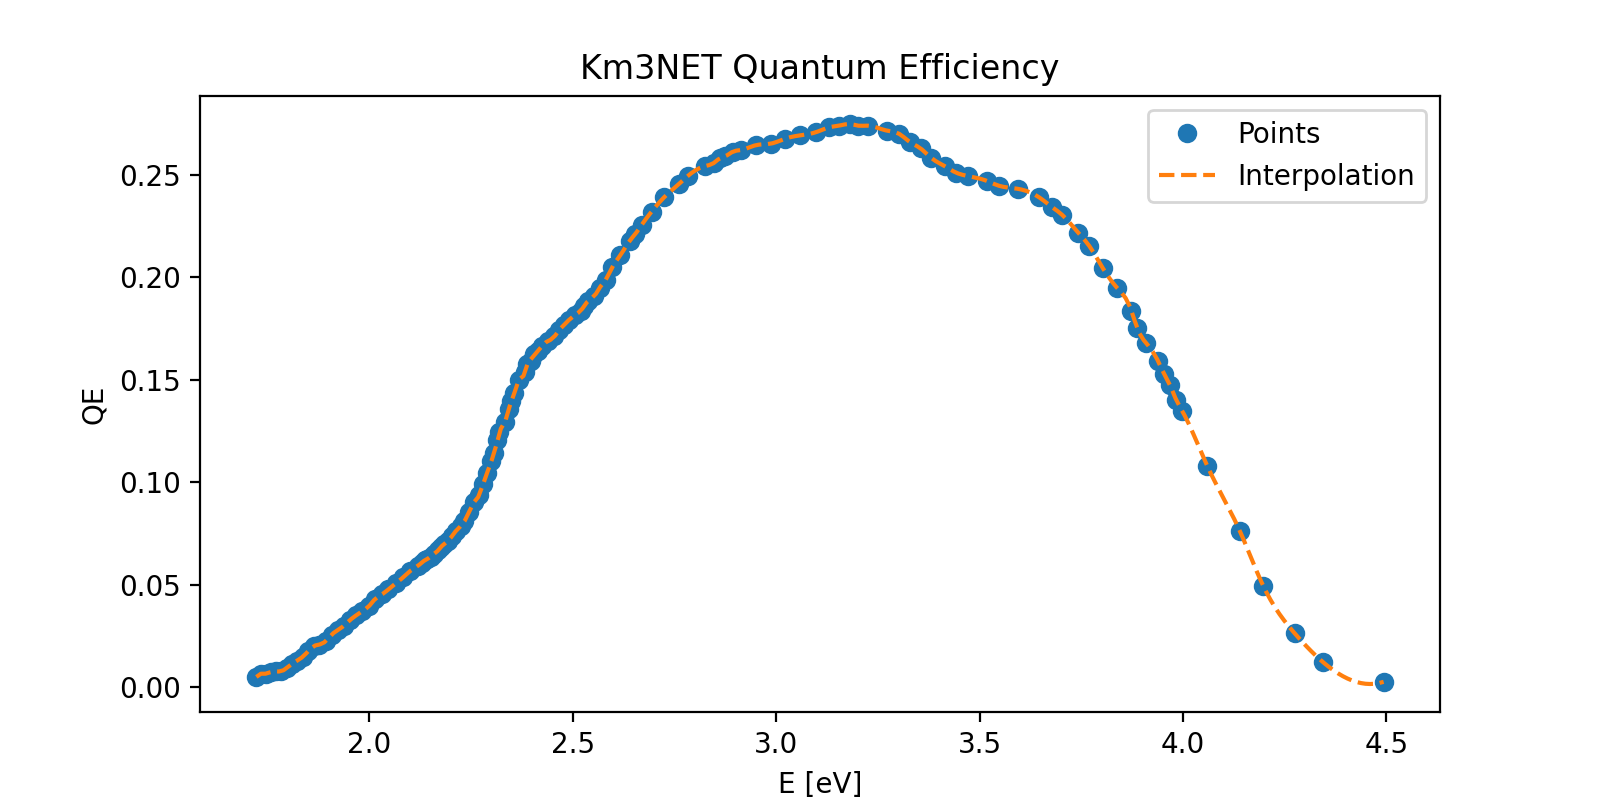

In [4]:
#plot the QE function for reference
plt.close()
plt.figure(figsize=(8,4))
plt.plot(qeData.T[0],qeData.T[1],'o',label="Points",color="C0")
plt.plot(xpts,intPts,'--',label="Interpolation",color="C1")
plt.title("Km3NET Quantum Efficiency")
plt.xlabel("E [eV]")
plt.ylabel("QE")
plt.legend(loc=0)
plt.show()

# Coincidences

In [13]:
def QE_filtering(dirstring):
    '''Get QE of each simulated coincidence along with whether it was a true coincidence
        
        Parameters:
            dirstring (string): The directory of the coincidence data, the function
                                will go into this directory assuming all files in this
                                dir are coincidence files. These files should have been
                                analyzed by the ene_coincs.py script found in
                                /data/p-one/mens/G4/absorption/coincs/ as this script will
                                properly prepare the coincidence files with the photon energies
                                in the correct location. 
                                
        Returns:
            true (numpy array): The array of true coincidences along with all gathered information on this
                                coincidence (ie hit radius of both pmts and photon energy of both pmts).
                        
            tweight (numpy array): The array of QE weights for each true coincidence, since each coincidence
                                    is a hit on both up and down pmts each value in this array will be the 
                                    product of the two QE found from the coincident photons. 
                                    
            all_ (numpy array): The array of all coincidences along with all gathered information on these
                                coincidences (ie hit radius of both pmts and photon energy of both pmts).
                                
            aweight (numpy array): The array of QE weights for each coincidence, since each coincidence
                                    is a hit on both up and down pmts each value in this array will be the 
                                    product of the two QE found from the coincident photons.'''
    coincs = os.listdir(dirstring)
    true = []
    tweight = []
    all_ = []
    aweight = []
    for file in coincs:
        c = np.loadtxt(dirstring+file,delimiter="\t")
        try: 
            a = np.shape(c)
            if a[1] >0:
                for co in c:
                    all_.append(co)
                    w1 = f(co[4])
                    w2 = f(co[5])
                    if np.isnan(w1):
                        w1=0
                    if np.isnan(w2):
                        w2=0
                    aweight.append(w1*w2)
                    if abs(co[2]-co[3])<2:
                        true.append(co)
                        tweight.append(w1*w2)
                
        except IndexError:
            all_.append(c)
            w1 =f(c[4])
            w2 = f(c[5])
            if np.isnan(w1):w1=0
            if np.isnan(w2):w2=0
            aweight.append(w1*w2)
            if abs(c[2]-c[3])<2:
                true.append(c)
                tweight.append(w1*w2)
            
    
    true = np.array(true)
    tweight = np.array(tweight)
    all_ = np.array(all_); aweight = np.array(aweight)
    return true,tweight,all_,aweight

In [14]:
#get the QE for illume and cedar data
itrue,itweight,iall,iaweight = QE_filtering("Data/QE_coinc/icoincs/")
ctrue,ctweight,call,caweight = QE_filtering("Data/QE_coinc/ccoincs/")

In [16]:
#combine illume and cedar into single arrays
true = np.concatenate((itrue,ctrue)); tweight = np.concatenate((itweight,ctweight))
all_ = np.concatenate((iall,call)); aweight = np.concatenate((iaweight,caweight))
#true = itrue; tweight = itweight; all_=iall; aweight=iaweight;

In [17]:
#save data in text files
np.savetxt('Data/QE_coinc/true.txt',true,delimiter="\t")
np.savetxt('Data/QE_coinc/tweight.txt',tweight)
np.savetxt('Data/QE_coinc/all.txt',all_,delimiter="\t")
np.savetxt('Data/QE_coinc/aweight.txt',aweight,delimiter="\t")

In [19]:
np.shape(ctrue)

(2491, 6)